In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #pyplot used when we want to plot nos
from matplotlib import style
%matplotlib inline  
import seaborn as sns

In [2]:
#Import data into Python environment.
Comcast_data=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
Comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
Comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [5]:
Comcast_data['Date_month_year'] =  pd.to_datetime(Comcast_data['Date_month_year'])

In [6]:
Comcast_data['Date_month_year'].dtype

dtype('<M8[ns]')

In [7]:
Comcast_data['Year'] = Comcast_data['Date_month_year'].dt.year
Comcast_data['Month'] = Comcast_data['Date_month_year'].dt.month
Comcast_data['Day'] = Comcast_data['Date_month_year'].dt.day

In [8]:
Comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year,Month,Day
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,8,4
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,7,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,5,26


In [9]:
Comcast_data['Month'].value_counts()

6     1046
4      375
5      317
8       67
12      65
2       59
9       55
1       55
10      53
7       49
3       45
11      38
Name: Month, dtype: int64

Text(0.5, 1.0, 'Trend chart for the number of complaints at monthly')

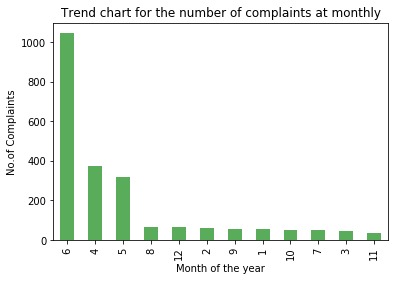

In [10]:
Comcast_data['Month'].value_counts().plot(kind='bar',color='g',alpha=0.65)
plt.xlabel('Month of the year')
plt.ylabel('No.of Complaints')
plt.title('Trend chart for the number of complaints at monthly')
## Maximum no. of complaints are recieved for the month of June and minimum no. of complaints are recieved for the month of Jan

In [11]:
## No.of complaints on the daily Granuality basis
Comcast_data['Day'].value_counts()

6     272
24    249
23    225
4     206
5     131
25    126
26     90
29     87
30     86
27     81
28     79
18     69
13     68
22     66
16     65
17     60
15     58
14     54
20     51
19     50
21     41
31     10
Name: Day, dtype: int64

Text(0.5, 1.0, 'Trend chart for the number of complaints at daily basis')

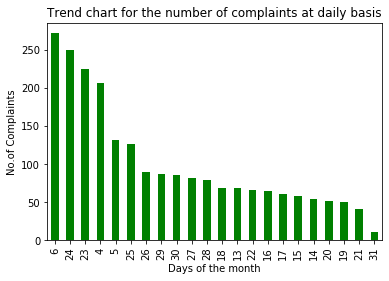

In [12]:
Comcast_data['Day'].value_counts().plot(kind='bar',color='g')
plt.xlabel('Days of the month')
plt.ylabel('No.of Complaints')
plt.title('Trend chart for the number of complaints at daily basis')
# on the 6 th day of the every month maximum no. of complaints recieved 

# Provide a table with the frequency of complaint types.

In [13]:
Comcast_data['Customer Complaint'] = Comcast_data['Customer Complaint'].str.lower()

In [14]:
Comcast_data['Customer Complaint'].value_counts().head(15)
# Comcast data Cap have 30+21 complaints 

comcast                     102
comcast data cap             30
comcast internet             29
comcast data caps            21
comcast billing              18
comcast service              15
internet speed               15
unfair billing practices     13
data caps                    13
data cap                     12
comcast complaint            11
comcast/xfinity              11
comcast internet service     10
billing                       9
billing issues                8
Name: Customer Complaint, dtype: int64

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [15]:
Comcast_data['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [16]:
def cat(x):
    if (x=='Open'):
     return 'Open'
    if (x=='Pending'):
     return 'Open'
    if (x=='Closed'):
     return 'Closed'
    if (x=='Solved'):
     return 'Closed'
cat('Solved')

'Closed'

In [17]:
Comcast_data['New_Status']=Comcast_data['Status'].apply(cat)

In [18]:
Comcast_data[['Status','New_Status']][:20]

,Status,New_Status
0,Closed,Closed
1,Closed,Closed
2,Closed,Closed
3,Open,Open
4,Solved,Closed
5,Solved,Closed
6,Pending,Open
7,Solved,Closed
8,Closed,Closed
9,Open,Open


# Provide state wise status of complaints in a stacked bar chart.

In [19]:
Comcast_data['State'].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
Delaware                 12
New Hampshire            12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont             

In [20]:
plot_data= Comcast_data[['State','New_Status']]
plot_data

,State,New_Status
0,Maryland,Closed
1,Georgia,Closed
2,Georgia,Closed
3,Georgia,Open
4,Georgia,Closed
...,...,...
2219,Florida,Closed
2220,Michigan,Closed
2221,Michigan,Closed
2222,Michigan,Closed


# Which state has the maximum complaints

In [21]:
pd.DataFrame(plot_data.State.value_counts())
# Georgia has the maximum number of complaints

,State
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80
Maryland,78


In [22]:
pd.DataFrame(plot_data.New_Status.value_counts())

,New_Status
Closed,1707
Open,517


In [23]:
byState=plot_data.groupby('State').New_Status.value_counts(normalize=True)
byState

State          New_Status
Alabama        Closed        0.653846
               Open          0.346154
Arizona        Closed        0.700000
               Open          0.300000
Arkansas       Closed        1.000000
                               ...   
Virginia       Open          0.183333
Washington     Closed        0.765306
               Open          0.234694
West Virginia  Closed        0.727273
               Open          0.272727
Name: New_Status, Length: 77, dtype: float64

<Figure size 3600x3600 with 0 Axes>

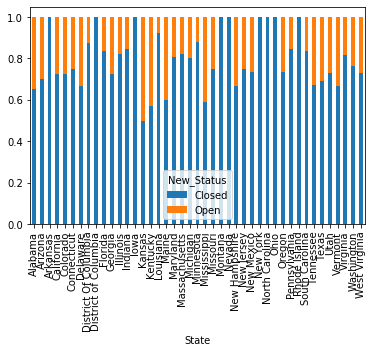

In [24]:
fig = plt.gcf()
fig.set_size_inches(50, 50,forward=True)
byState.unstack().plot(kind='bar',stacked=True)
# From this graph we can Conclude that the KANSAS state have maximum open Complaints and the states like LOWA and NewYork and
# some more states doesn't have any open Complaint

# Which state has the highest percentage of unresolved complaints

In [52]:
Unresolved_data = Comcast_data[['State','New_Status']]

In [53]:
Unresolved_data.head()

,State,New_Status
0,Maryland,Closed
1,Georgia,Closed
2,Georgia,Closed
3,Georgia,Open
4,Georgia,Closed


In [56]:
Unresolved_data=Unresolved_data.loc[Unresolved_data['New_Status']=='Open']
Unresolved_data.head()


,State,New_Status
3,Georgia,Open
6,Georgia,Open
9,California,Open
12,New Mexico,Open
15,New Mexico,Open


In [61]:
Plot_data1=Unresolved_data['State'].value_counts(normalize=True)*100
Plot_data1

Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Washington               4.448743
Michigan                 4.448743
Colorado                 4.255319
Texas                    4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Massachusetts            2.127660
Virginia                 2.127660
Indiana                  1.740812
Alabama                  1.740812
Arizona                  1.160542
Utah                     1.160542
Delaware                 0.773694
New Mexico               0.773694
New Hampshire            0.773694
Minnesota                0.773694
Kentucky                 0.580271
Connecticut              0.580271
West Virginia            0.580271
South Carolina           0.580271
District Of Columbia     0.386847
Maine         

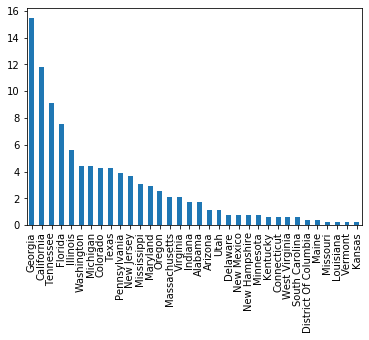

In [62]:
Plot_data1.plot(kind='bar')
#State 'Georgia' has the maximum percentage of unresolved complaints i.e. 15.47%

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [66]:
Resolved_data=Comcast_data[['Received Via','New_Status']]
Resolved_data.head()

,Received Via,New_Status
0,Customer Care Call,Closed
1,Internet,Closed
2,Internet,Closed
3,Internet,Open
4,Internet,Closed


In [67]:
Resolved_data=Resolved_data.loc[Resolved_data['New_Status']=='Closed']
Resolved_data.head()

,Received Via,New_Status
0,Customer Care Call,Closed
1,Internet,Closed
2,Internet,Closed
4,Internet,Closed
5,Internet,Closed


In [69]:
Resolved_data['Received Via'].value_counts(normalize=True)*100

Customer Care Call    50.615114
Internet              49.384886
Name: Received Via, dtype: float64

In [ ]:
# 50.61 % of complaints are resolved till date which were received through the customer care calls.
# 49.38 % of complaints are resolved till date which were received through the internet

# ******************** Thank You****************